In [48]:
import netCDF4
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# 1. Global methane levels from 2002
monthly-averaged methane levels (xch4) in the unit of ppb at each 5° (lon) x 5° (lat) grid over the globe from 2003-01 to 2020-06.

1.1 [5 points] Compute methane climatology for each month, and plot your results in 12 panels.

1.2 [5 points] Plot globally-averaged methane from 2003-01 to 2020-06 as a time series. Describe your results. Check your plot with this one.

1.3 [5 points] Plot deseasonalized methane levels at point [15°S, 150°W] from 2003-01 to 2020-06 as a time series. Describe your results.

In [2]:
CH4=xr.open_dataset("200301_202006-C3S-L3_GHG-PRODUCTS-OBS4MIPS-MERGED-v4.3.nc", engine="netcdf4")
methane=CH4['xch4']

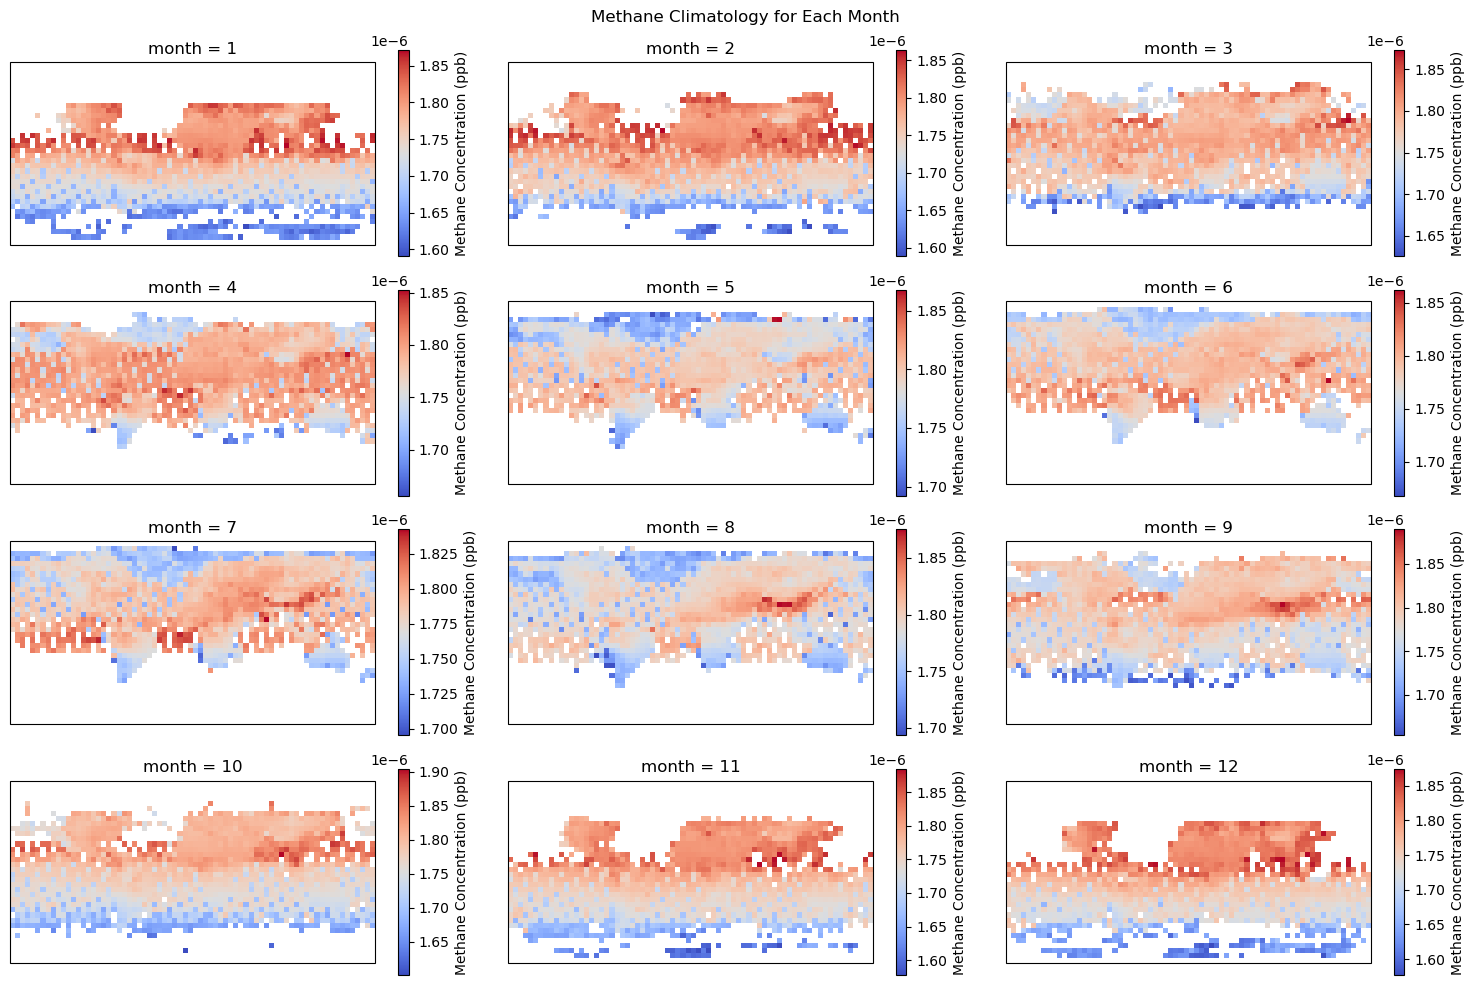

In [15]:
#1.1
CH4_clim=methane.groupby('time.month').mean(dim='time')
CH4_clim
#12 panels
fig, axes = plt.subplots(4, 3, figsize=(15, 10), subplot_kw={'projection': ccrs.PlateCarree()})
fig.suptitle('Methane Climatology for Each Month')

#each month information
for i, ax in enumerate(axes.ravel()):
    month_clim=CH4_clim.isel(month=i) 
    month_clim.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='coolwarm', cbar_kwargs={'label': 'Methane Concentration (ppb)'})
    
plt.tight_layout()
plt.show()

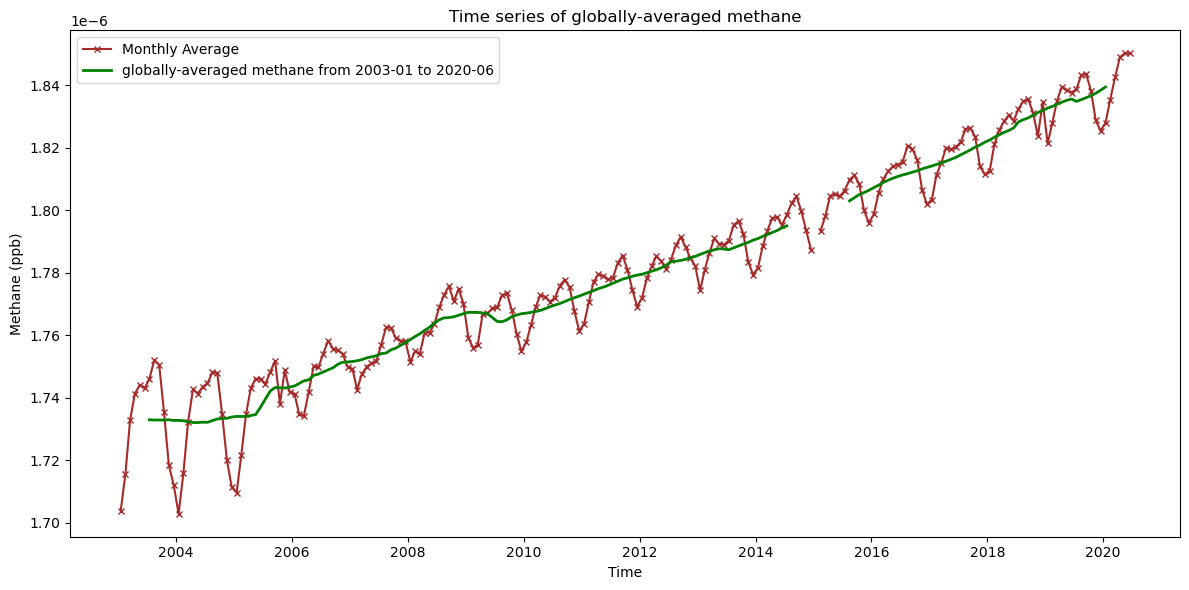

In [27]:
#1.2 globally-averaged methane
global_avg_CH4=methane.mean(dim=['lat', 'lon'])
CH4_mean=global_avg_CH4.rolling(time=12, center=True).mean()
fig, ax=plt.subplots(figsize=(12, 6))
ax.plot(global_avg_CH4['time'], global_avg_CH4, color='brown', marker='x', linestyle='-', label='Monthly Average', markersize=4)
ax.plot(CH4_mean['time'], CH4_mean, color='green', linewidth=2, label='globally-averaged methane from 2003-01 to 2020-06')
ax.set_title("Time series of globally-averaged methane")
ax.set_xlabel("Time")
ax.set_ylabel("Methane (ppb)")
ax.legend()
plt.tight_layout()
plt.show()

Although some values are missing, it can be seen that the CH4 concentration has been increasing in recent years and change in the annual cycle.

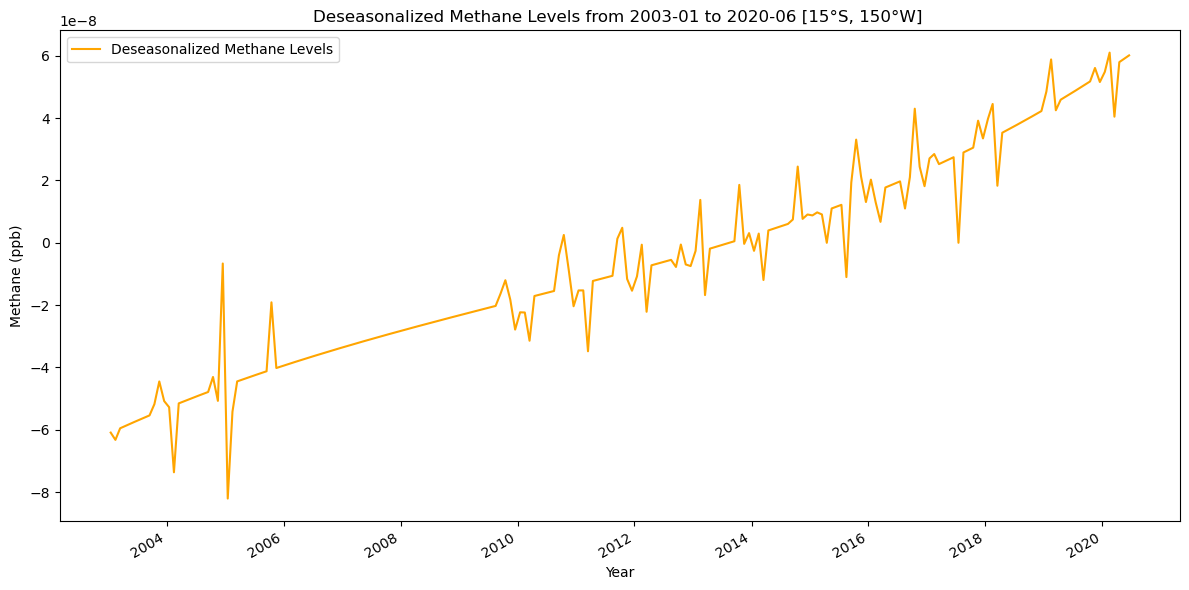

In [35]:
#1.3
point=CH4['xch4'].sel(lat=-15, lon=-150, method='nearest')
monthly_clim=point.groupby('time.month').mean()
#deseasonalized
deseasonalized= point.groupby('time.month') - monthly_clim
deseasonalized_new=deseasonalized.interpolate_na(dim="time", method="spline", order=3)
plt.figure(figsize=(12, 6))
deseasonalized_new.plot(label='Deseasonalized Methane Levels', color='orange')
plt.title("Deseasonalized Methane Levels from 2003-01 to 2020-06 [15°S, 150°W] ")
plt.xlabel("Year")
plt.ylabel("Methane (ppb)")
plt.legend()
plt.tight_layout()
plt.show()

I got inspired on how to deal with the missing values in  time series by reading https://blog.csdn.net/csdn1561168266/article/details/143610287

# 2. Niño 3.4 index
the Niño 3.4 index typically uses a 3-month running mean, and El Niño or La Niña events are defined when the Niño 3.4 SSTs exceed +/- 0.5°C for a period of 5 months or more.

1.1 [10 points] Compute monthly climatology for SST from Niño 3.4 region, and subtract climatology from SST time series to obtain anomalies.

1.2 [10 points] Visualize the computed Niño 3.4. Your plot should look similar to this one.

In [37]:
SST = xr.open_dataset("NOAA_NCDC_ERSST_v3b_SST.nc", engine="netcdf4")
SST.info
#SST['sst']

<bound method Dataset.info of <xarray.Dataset>
Dimensions:  (lat: 89, lon: 180, time: 684)
Coordinates:
  * lat      (lat) float32 -88.0 -86.0 -84.0 -82.0 -80.0 ... 82.0 84.0 86.0 88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1960-01-15 1960-02-15 ... 2016-12-15
Data variables:
    sst      (time, lat, lon) float32 ...
Attributes:
    Conventions:  IRIDL
    source:       https://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCDC/.ERSST/...
    history:      extracted and cleaned by Ryan Abernathey for Research Compu...>

In [40]:
#2.1
# Calculate the climatology 
SST_clim = SST.sst.groupby('time.month').mean()
SST_clim
# Group data by month
group_data = SST.sst.sel(lat=slice(-5, 5), lon=slice(190, 240)).groupby('time.month')
# Anomaly 
SST_anom = group_data - group_data.mean()
SST_anom

<xarray.DataArray 'sst' (time: 684, lat: 5, lon: 26)>
array([[[-0.43157768, -0.41846275, -0.39795303, ..., -0.2116642 ,
         -0.23776245, -0.24401474],
        [-0.41259003, -0.4067192 , -0.3875141 , ..., -0.52064896,
         -0.5346451 , -0.51997185],
        [-0.40932274, -0.39743805, -0.36237717, ..., -0.6373882 ,
         -0.6171951 , -0.583725  ],
        [-0.4140854 , -0.37909317, -0.3215618 , ..., -0.43292618,
         -0.38404274, -0.3352623 ],
        [-0.5043678 , -0.43894005, -0.3710251 , ..., -0.17453575,
         -0.11044502, -0.06918144]],

       [[-0.5374584 , -0.52739716, -0.50823593, ..., -0.40254593,
         -0.44382668, -0.45287704],
        [-0.55093956, -0.539135  , -0.51673317, ..., -0.6660595 ,
         -0.7127285 , -0.710968  ],
        [-0.61242104, -0.5959244 , -0.5572338 , ..., -0.7235069 ,
         -0.7326374 , -0.73106194],
        [-0.6798363 , -0.6483364 , -0.5889931 , ..., -0.5397434 ,
         -0.50793266, -0.49977684],
        [-0.7830448 , -0.7286701 , -0.6683655 , ..., -0.33967972,
...
         -0.2555828 , -0.13972664],
        [-0.989378  , -1.0497723 , -1.0954857 , ..., -0.86087227,
         -0.7690697 , -0.65498734],
        [-1.1887245 , -1.252285  , -1.3029232 , ..., -1.0460625 ,
         -0.9661274 , -0.8785801 ],
        [-1.002367  , -1.0756893 , -1.1325111 , ..., -0.7207298 ,
         -0.6597252 , -0.5900669 ],
        [-0.5770798 , -0.65514374, -0.72174263, ..., -0.4353485 ,
         -0.36265945, -0.28103828]],

       [[-0.3578701 , -0.41542053, -0.47110367, ..., -0.2400589 ,
         -0.1464405 , -0.03788376],
        [-0.7678585 , -0.83501625, -0.9024124 , ..., -0.727829  ,
         -0.61603355, -0.48027992],
        [-0.96187973, -1.0445309 , -1.1224213 , ..., -0.9327831 ,
         -0.81235695, -0.6655674 ],
        [-0.82112694, -0.9206734 , -1.0085506 , ..., -0.6531601 ,
         -0.5626869 , -0.4374504 ],
        [-0.4864292 , -0.5823746 , -0.6702862 , ..., -0.36221695,
         -0.30041504, -0.1987915 ]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 -4.0 -2.0 0.0 2.0 4.0
  * lon      (lon) float32 190.0 192.0 194.0 196.0 ... 234.0 236.0 238.0 240.0
  * time     (time) datetime64[ns] 1960-01-15 1960-02-15 ... 2016-12-15
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12

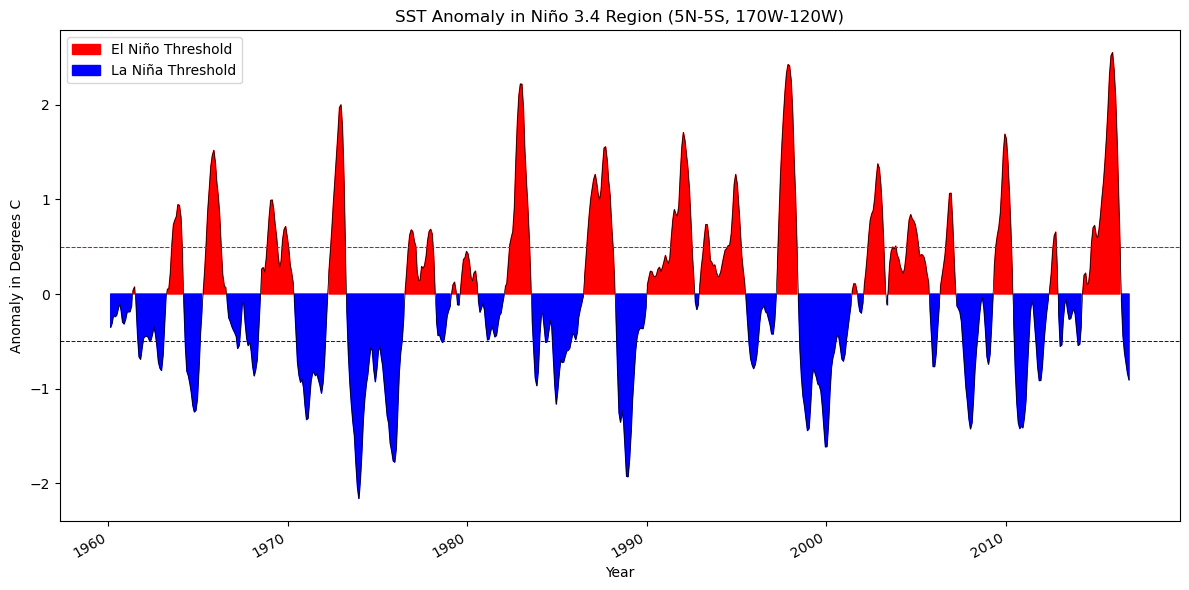

In [51]:
#2.2
SST_mean=SST.sst.sel(lat=slice(-5, 5), lon=slice(190,240)).mean(dim=['lat', 'lon'])
rolling = SST_mean.rolling(time=3, center=True).mean()
group_SST =rolling.groupby('time.month')
anom =group_SST - group_SST.mean()

plt.figure(figsize=(12, 6))
anom.plot(color='black', linewidth=0.5)
#Visualize
plt.fill_between(
    anom.time.values,
    anom.values,
    0,
    where=(anom > 0),
    color='red',
    label='El Niño Threshold',
)
plt.fill_between(
    anom.time.values,
    anom.values,
    0,
    where=(anom < 0),
    color='blue',
    label='La Niña Threshold',
)

plt.axhline(0.5, color='red', linestyle='--', linewidth=0.75)
plt.axhline(-0.5, color='blue', linestyle='--', linewidth=0.75)

plt.title("SST Anomaly in Niño 3.4 Region (5N-5S, 170W-120W)")
plt.ylabel("Anomaly in Degrees C")
plt.xlabel("Year")
plt.legend()
plt.tight_layout()
plt.show()

# 3. Explore a netCDF dataset
3.1 [5 points] Plot a time series of a certain variable with monthly seasonal cycle removed.

3.2 [10 points] Make at least 5 different plots using the dataset.

Data resources:
NASA’s Goddard Earth Sciences Data and Information Services Center (GES DISC) https://data.gesdisc.earthdata.nasa.gov/data/CMS/GEOS_CASAGFED_D_FIRE.2/GEOSCarb_CASAGFED3v2_Fire.Daily.x720_y360.2014.nc

In [54]:
ds = xr.open_dataset("GEOSCarb_CASAGFED3v2_Fire.Daily.x720_y360.2014.nc", engine="netcdf4")
ds.info

<bound method Dataset.info of <xarray.Dataset>
Dimensions:    (longitude: 720, latitude: 360, time: 365, bounds: 2)
Coordinates:
  * longitude  (longitude) float64 -179.8 -179.2 -178.8 ... 178.8 179.2 179.8
  * latitude   (latitude) float64 -89.75 -89.25 -88.75 ... 88.75 89.25 89.75
  * time       (time) datetime64[ns] 2014-01-01T12:00:00 ... 2014-12-31T12:00:00
Dimensions without coordinates: bounds
Data variables:
    FIRE       (time, latitude, longitude) float32 ...
    FUEL       (time, latitude, longitude) float32 ...
    time_bds   (time, bounds) datetime64[ns] ...
Attributes: (12/24)
    Conventions:                    CF-1.7
    title:                          2014 GEOS-Carb CASA-GFED3 Daily Fire Emis...
    source:                         CASA-GFED3 Model using MERRA-2 meteorology
    contact:                        Lesley Ott Lesley.Ott@nasa.gov
    history:                        Files written by IDL
    institution:                    NASA Global Modeling and Assimilation 

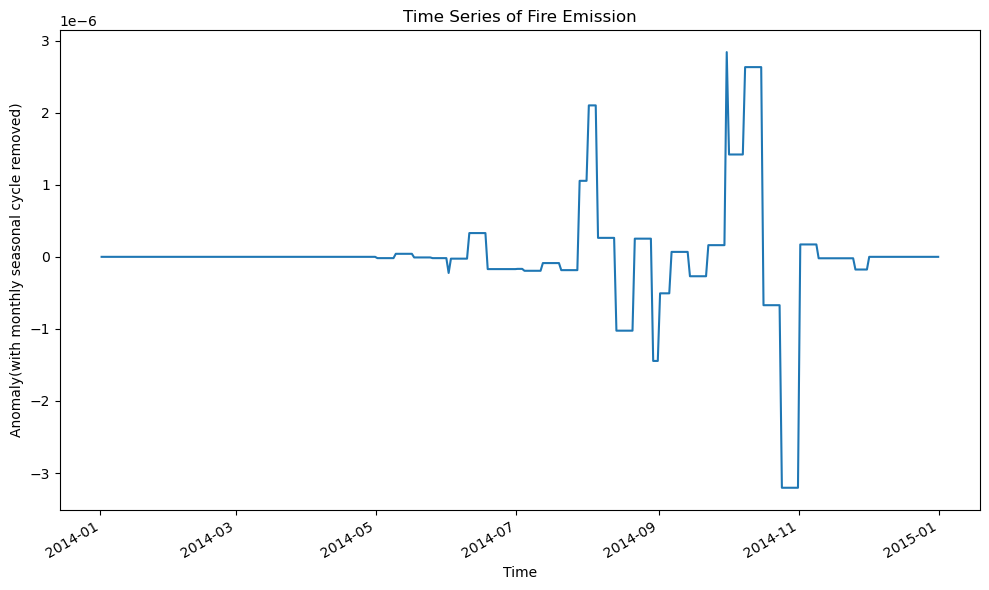

In [64]:
#3.1
#ds["FIRE"]
group_ds = ds.FIRE.sel(latitude=slice(-5, 5), longitude=slice(120, 170)).groupby('time.month')
ds_anom = group_ds - group_ds.mean()
ds_anom_time_series = ds_anom.mean(dim=["latitude", "longitude"])
plt.figure(figsize=(10, 6))
ds_anom_time_series.plot()
plt.title('Time Series of Fire Emission')
plt.xlabel('Time')
plt.ylabel('Anomaly(with monthly seasonal cycle removed)')
plt.tight_layout()
plt.show()

Text(0, 0.5, 'FIRE Anomaly')

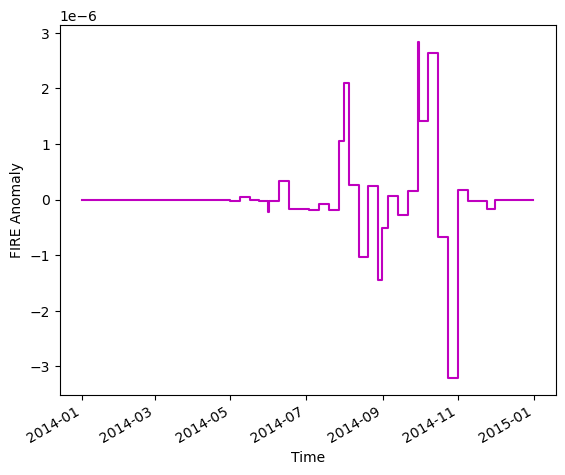

In [81]:
#3.2
#step plot
ds_anom_time_series.plot.step(x="time", color='m')
plt.xlabel("Time")
plt.ylabel("FIRE Anomaly")

Text(0, 0.5, 'FIRE Anomaly')

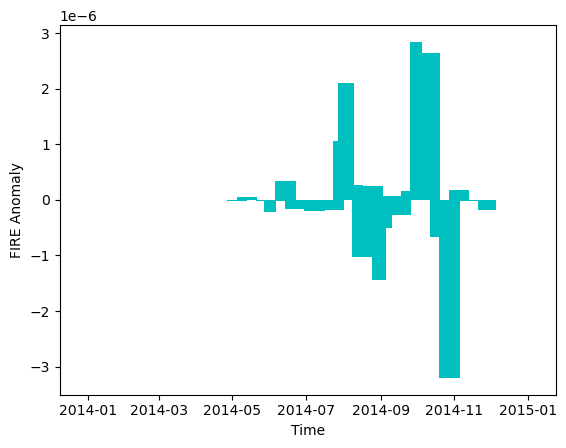

In [84]:
#bar chart
plt.bar(ds_anom_time_series.time, ds_anom_time_series, color='c', width=10.0)
plt.xlabel("Time")
plt.ylabel("FIRE Anomaly")

Text(0, 0.5, 'FIRE Anomaly')

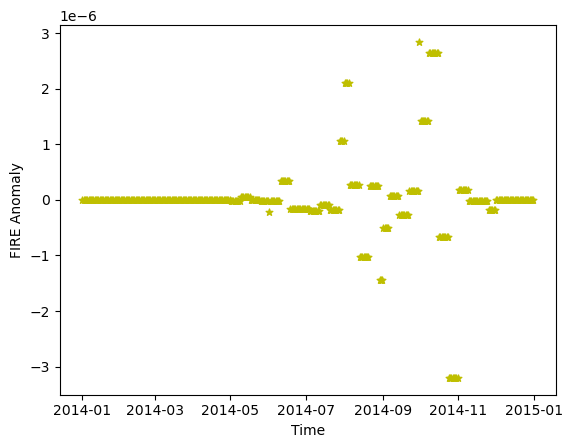

In [82]:
#scatter plot
plt.scatter(ds_anom_time_series.time, ds_anom_time_series, color='y', s=25, marker='*')
plt.xlabel("Time")
plt.ylabel("FIRE Anomaly")

<Axes: >

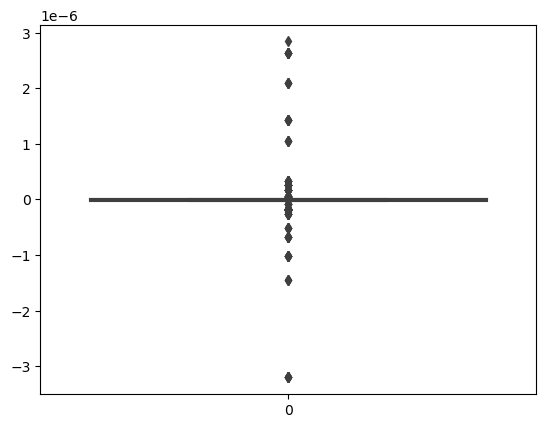

In [117]:
#boxplot
import seaborn as sns
sns.boxplot(ds_anom_time_series.values)

Text(0, 0.5, 'Frequency')

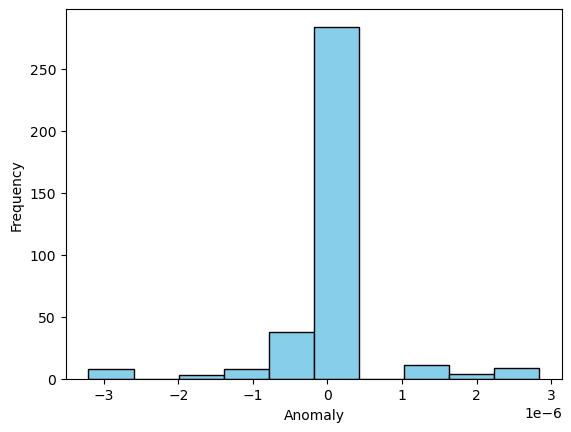

In [88]:
#histgram
plt.hist(ds_anom_time_series.values, edgecolor='black', color='skyblue')
plt.xlabel('Anomaly')
plt.ylabel('Frequency')